# Parallel Coordinates

This section showcases the parallel coordinates chart. It contains examples of how to create parallel coordinates plots using the [datachart.charts.ParallelCoords](/references/charts#datachart.charts.ParallelCoords) function.

Parallel coordinates are useful for visualizing multivariate data, where each variable is represented as a vertical axis and each data point is shown as a line connecting its values across all axes.

The examples sequentially build on each other, going from simple to complex.

As mentioned above, the parallel coordinates charts are created using the `ParallelCoords` function found in the [datachart.charts](datachart.charts) module. Let's import it:

In [1]:
from datachart.charts import ParallelCoords

<div class="admonition note">
    <p class="admonition-title">Double figure generation avoidence</p>
    <p style="margin-top: .6rem; margin-bottom: .6rem">
        To avoid double figure generation, the <code>ParallelCoords</code> function is preceded by the <code>_ =</code> operator. The double figures are generated because <code>ParallelCoords</code> returns the <code>plt.Figure</code> object, which is then used to save the figure locally.
    </p>
</div>

## Parallel Coordinates Input Attributes

The `ParallelCoords` function accepts keyword arguments for chart configuration. The main argument is `data`, which contains the data points. Each data point is a dictionary where keys are dimension names and values can be numeric or categorical (string).

```python
ParallelCoords(
    data=[{                                             # A list of data points
        "dim1": Union[int, float],                      # Numeric dimension
        "dim2": Union[int, float],                      # Numeric dimension
        "dim3": str,                                    # Categorical dimension (string)
        # ... more dimensions
        "hue": Optional[str],                           # Optional category for coloring
    }],
    style={                                             # The style of the lines (optional)
        "plot_parallel_color": Optional[str],           # The color of the lines (hex color code)
        "plot_parallel_alpha": Optional[float],         # The alpha of the lines
        "plot_parallel_width": Optional[float],         # The width of the lines
        "plot_parallel_style": Optional[LINE_STYLE],    # The line style (solid, dashed, etc.)
    },
    subtitle=Optional[str],                             # The subtitle of the chart
    title=Optional[str],                                # The title of the chart
    xlabel=Optional[str],                               # The x-axis label
    ylabel=Optional[str],                               # The y-axis label

    dimensions=Optional[List[str]],                     # List of dimensions to show (and their order)
    hue=Optional[str],                                  # Key name for categorical coloring
    show_legend=Optional[bool],                         # Whether to show the legend
    category_orders=Optional[Dict[str, List[str]]],     # Custom order for categorical dimensions
)
```

**Dimension Types:**
- **Numeric dimensions**: Values are normalized to [0, 1] range with tick marks showing actual values at 0%, 25%, 50%, 75%, and 100% positions.
- **Categorical dimensions**: String values are automatically detected and displayed as labeled tick marks. By default sorted alphabetically, but can be customized with `category_orders`.

For more details, see the [datachart.typings.ParallelCoordsChartAttrs](/references/typings/#datachart.typings.ParallelCoordsChartAttrs) type.

## Basic Parallel Coordinates

In this part, we show how to create a basic parallel coordinates chart.

Let us first import the necessary libraries and create some sample data:

In [2]:
import random

**Basic example.** Let us create a basic parallel coordinates chart with random data across multiple dimensions.

The following example shows how only the `data` argument is required to draw the chart. All numeric columns are automatically detected as dimensions.

In [3]:
chart_data = [
    {
        "var_a": random.gauss(50, 10),
        "var_b": random.gauss(100, 20),
        "var_c": random.gauss(25, 5),
        "var_d": random.gauss(75, 15),
    }
    for _ in range(30)
]

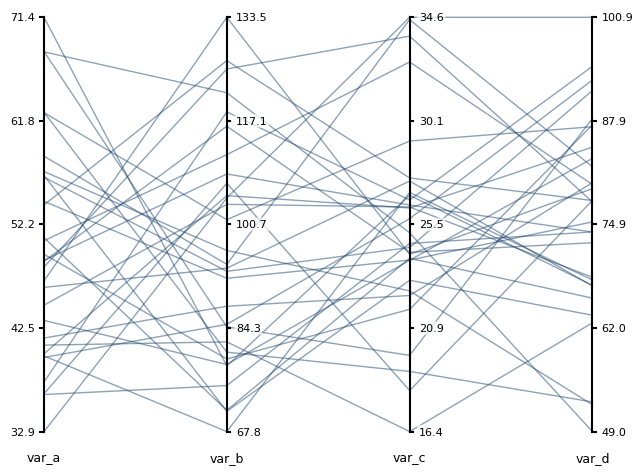

In [4]:
_ = ParallelCoords(
    # add the data to the chart
    data=chart_data
)

### Chart title and axis labels

To add the chart title and axis labels, simply add the `title`, `xlabel` and `ylabel` attributes.

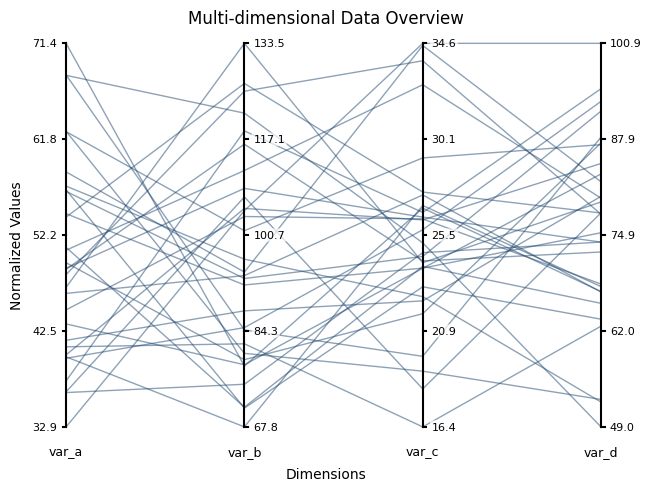

In [5]:
_ = ParallelCoords(
    data=chart_data,
    # add the title
    title="Multi-dimensional Data Overview",
    # add the x and y axis labels
    xlabel="Dimensions",
    ylabel="Normalized Values"
)

### Figure size

To change the figure size, simply add the `figsize` attribute. The `figsize` attribute can be a tuple (width, height), values are in inches. The `datachart` package provides a [datachart.constants.FIG_SIZE](/references/constants/#datachart.constants.FIG_SIZE) constant, which contains some of the predefined figure sizes.

In [6]:
from datachart.constants import FIG_SIZE

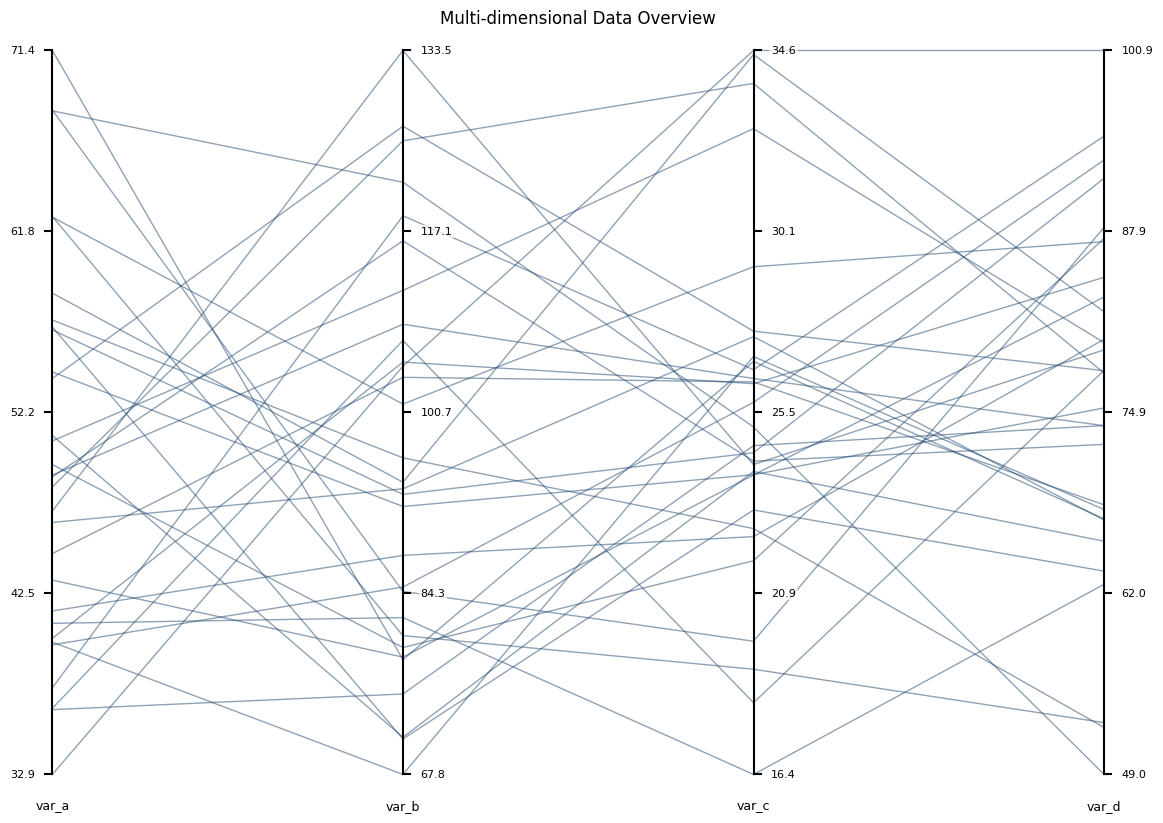

In [7]:
_ = ParallelCoords(
    data=chart_data,
    title="Multi-dimensional Data Overview",
    # add to determine the figure size
    figsize=FIG_SIZE.A4_LANDSCAPE
)

## Categorical Coloring with Hue

One of the most powerful features of parallel coordinates is the ability to color lines by category using the `hue` parameter. This is particularly useful for comparing groups in multivariate data.

Let's create data with distinct categories - similar to the classic Iris dataset example:

In [8]:
# Simulate Iris-like data with three species
iris_data = []

# Setosa: smaller petals, medium sepals
for _ in range(30):
    iris_data.append({
        "sepal_length": random.gauss(5.0, 0.35),
        "sepal_width": random.gauss(3.4, 0.38),
        "petal_length": random.gauss(1.5, 0.17),
        "petal_width": random.gauss(0.2, 0.1),
        "species": "setosa"
    })

# Versicolor: medium everything
for _ in range(30):
    iris_data.append({
        "sepal_length": random.gauss(5.9, 0.52),
        "sepal_width": random.gauss(2.8, 0.31),
        "petal_length": random.gauss(4.3, 0.47),
        "petal_width": random.gauss(1.3, 0.2),
        "species": "versicolor"
    })

# Virginica: larger everything
for _ in range(30):
    iris_data.append({
        "sepal_length": random.gauss(6.6, 0.64),
        "sepal_width": random.gauss(3.0, 0.32),
        "petal_length": random.gauss(5.5, 0.55),
        "petal_width": random.gauss(2.0, 0.27),
        "species": "virginica"
    })

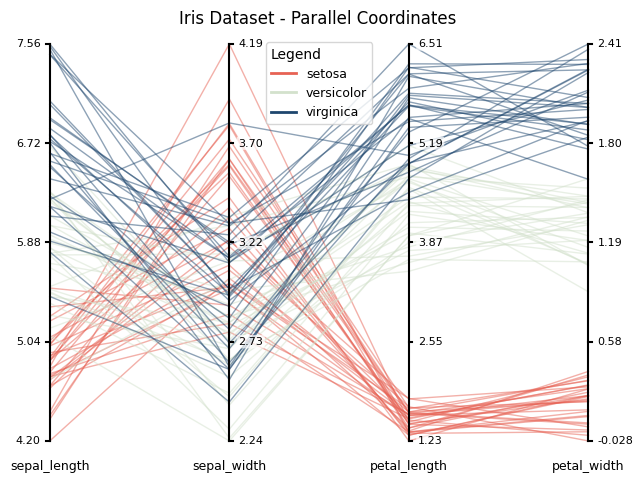

In [9]:
_ = ParallelCoords(
    data=iris_data,
    title="Iris Dataset - Parallel Coordinates",
    # specify which column to use for coloring
    hue="species",
    # show the legend to identify categories
    show_legend=True
)

### Specifying Dimensions

By default, all numeric columns are used as dimensions. You can explicitly specify which dimensions to show and in what order using the `dimensions` parameter:

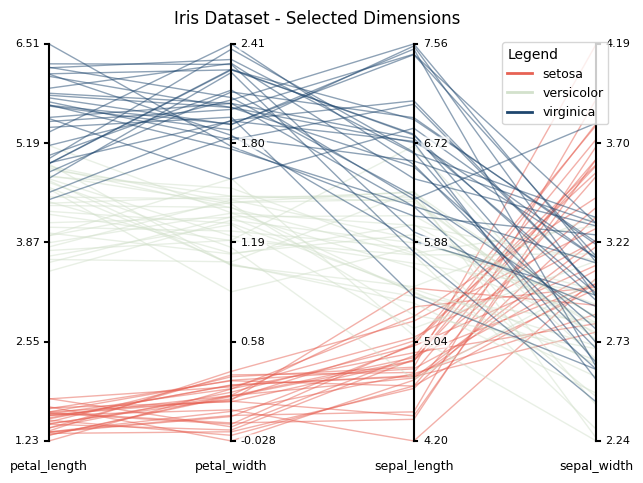

In [10]:
_ = ParallelCoords(
    data=iris_data,
    title="Iris Dataset - Selected Dimensions",
    hue="species",
    # specify dimensions and their order
    dimensions=["petal_length", "petal_width", "sepal_length", "sepal_width"],
    show_legend=True
)

## Customizing Line Style

To change the line style, simply add the `style` attribute with the corresponding attributes. The supported attributes are shown in the [datachart.typings.ParallelCoordsStyleAttrs](/references/typings/#datachart.typings.ParallelCoordsStyleAttrs) type:

| Attribute | Description |
| :-------- | :---------- |
| `"plot_parallel_color"` | The color of the lines (hex color code). |
| `"plot_parallel_alpha"` | The alpha of the lines (0.0 to 1.0). |
| `"plot_parallel_width"` | The width of the lines. |
| `"plot_parallel_style"` | The line style (solid, dashed, etc.). |

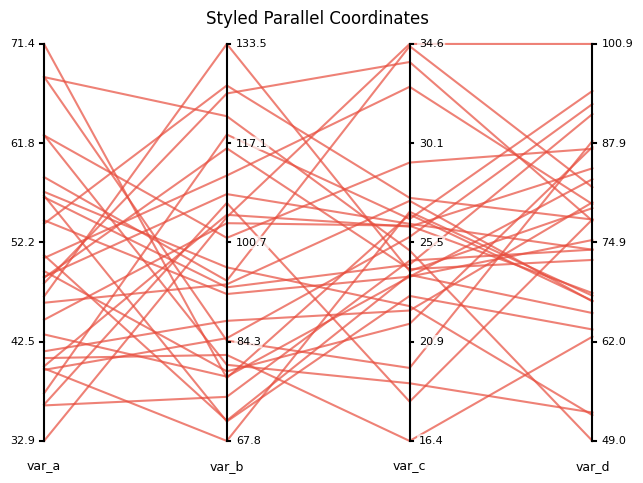

In [11]:
_ = ParallelCoords(
    data=chart_data,
    title="Styled Parallel Coordinates",
    style={
        "plot_parallel_color": "#e74c3c",
        "plot_parallel_alpha": 0.7,
        "plot_parallel_width": 1.5
    }
)

### Adjusting Transparency for Dense Data

When you have many data points, reducing the alpha value helps see patterns through overlapping lines:

In [12]:
# Create denser data
dense_data = [
    {
        "metric_a": random.gauss(50, 15),
        "metric_b": random.gauss(100, 30),
        "metric_c": random.gauss(25, 8),
        "metric_d": random.gauss(75, 20),
        "metric_e": random.gauss(60, 12),
    }
    for _ in range(100)
]

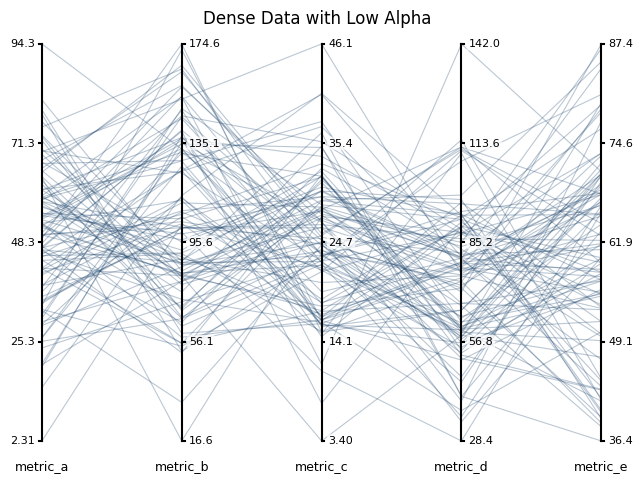

In [13]:
_ = ParallelCoords(
    data=dense_data,
    title="Dense Data with Low Alpha",
    style={
        "plot_parallel_alpha": 0.3,
        "plot_parallel_width": 0.8
    }
)

## Categorical Dimensions

Parallel coordinates also support categorical (string) dimensions. When a dimension contains string values, the categories are automatically detected and displayed as labeled tick marks on that axis.


You can include categorical columns directly as dimensions. This is useful when you want to visualize the relationship between numeric variables and a categorical variable:


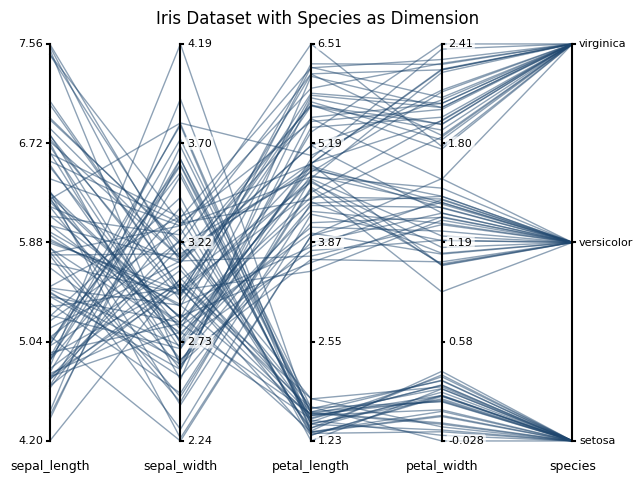

In [14]:
_ = ParallelCoords(
    data=iris_data,
    title="Iris Dataset with Species as Dimension",
    # include species as a dimension instead of using it for coloring
    dimensions=["sepal_length", "sepal_width", "petal_length", "petal_width", "species"],
)


In the example above, the `species` column is shown as a categorical axis with the three species names as tick labels. By default, categories are sorted alphabetically and evenly spaced along the axis.

### Custom Category Ordering

You can control the order of categorical values using the `category_orders` parameter. This is useful when categories have a natural order (like "Low", "Medium", "High") that differs from alphabetical:


In [15]:
# Create data with ordinal categories
ordinal_data = []
sizes = ["Small", "Medium", "Large", "XLarge"]
qualities = ["Poor", "Fair", "Good", "Excellent"]

for _ in range(50):
    size = random.choice(sizes)
    quality = random.choice(qualities)

    # Values correlate with size/quality
    size_factor = {"Small": 1, "Medium": 2, "Large": 3, "XLarge": 4}[size]
    quality_factor = {"Poor": 1, "Fair": 2, "Good": 3, "Excellent": 4}[quality]

    ordinal_data.append({
        "size": size,
        "weight": random.gauss(size_factor * 10, 2),
        "quality": quality,
        "price": random.gauss(size_factor * quality_factor * 5, 3),
    })


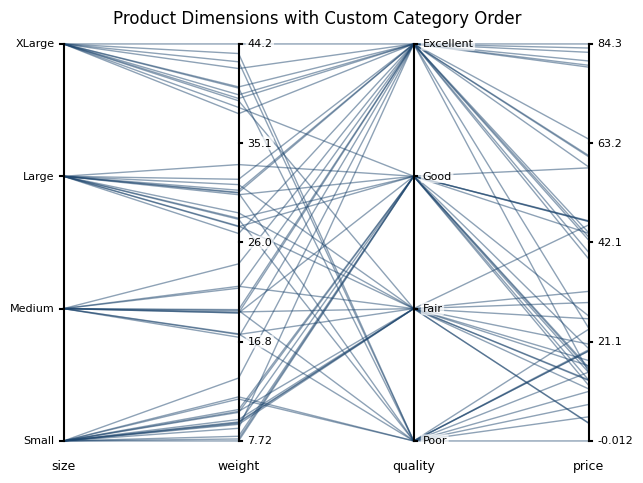

In [16]:
_ = ParallelCoords(
    data=ordinal_data,
    title="Product Dimensions with Custom Category Order",
    dimensions=["size", "weight", "quality", "price"],
    # Specify the order for categorical dimensions
    category_orders={
        "size": ["Small", "Medium", "Large", "XLarge"],
        "quality": ["Poor", "Fair", "Good", "Excellent"],
    },
)


The `category_orders` parameter is a dictionary where keys are dimension names and values are lists of categories in the desired order. Categories not included in the list will be appended at the end (sorted alphabetically).


### Combining Categorical Dimensions with Hue

You can combine categorical dimensions with hue-based coloring:


In [17]:
# Create data with multiple categorical attributes
product_data = []
categories = ["Electronics", "Clothing", "Food"]
ratings = ["Low", "Medium", "High"]

for _ in range(60):
    category = random.choice(categories)
    rating = random.choice(ratings)

    # Base values depend on category
    base_price = {"Electronics": 500, "Clothing": 100, "Food": 20}[category]
    base_sales = {"Electronics": 50, "Clothing": 200, "Food": 500}[category]

    product_data.append({
        "category": category,
        "price": random.gauss(base_price, base_price * 0.3),
        "sales": random.gauss(base_sales, base_sales * 0.3),
        "rating": rating,
        "satisfaction": random.gauss({"Low": 3, "Medium": 4, "High": 4.5}[rating], 0.5),
    })


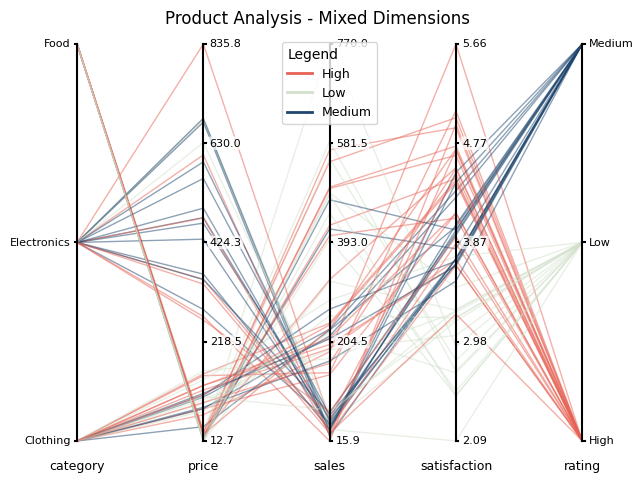

In [18]:
_ = ParallelCoords(
    data=product_data,
    title="Product Analysis - Mixed Dimensions",
    # Use category as a dimension (categorical)
    dimensions=["category", "price", "sales", "satisfaction", "rating"],
    # Color by rating
    hue="rating",
    show_legend=True,
)


## Saving the Chart as an Image

To save the chart as an image, use the [datachart.utils.save_figure](/references/utils#datachart.utils.save_figure) function.

In [19]:
from datachart.utils import save_figure

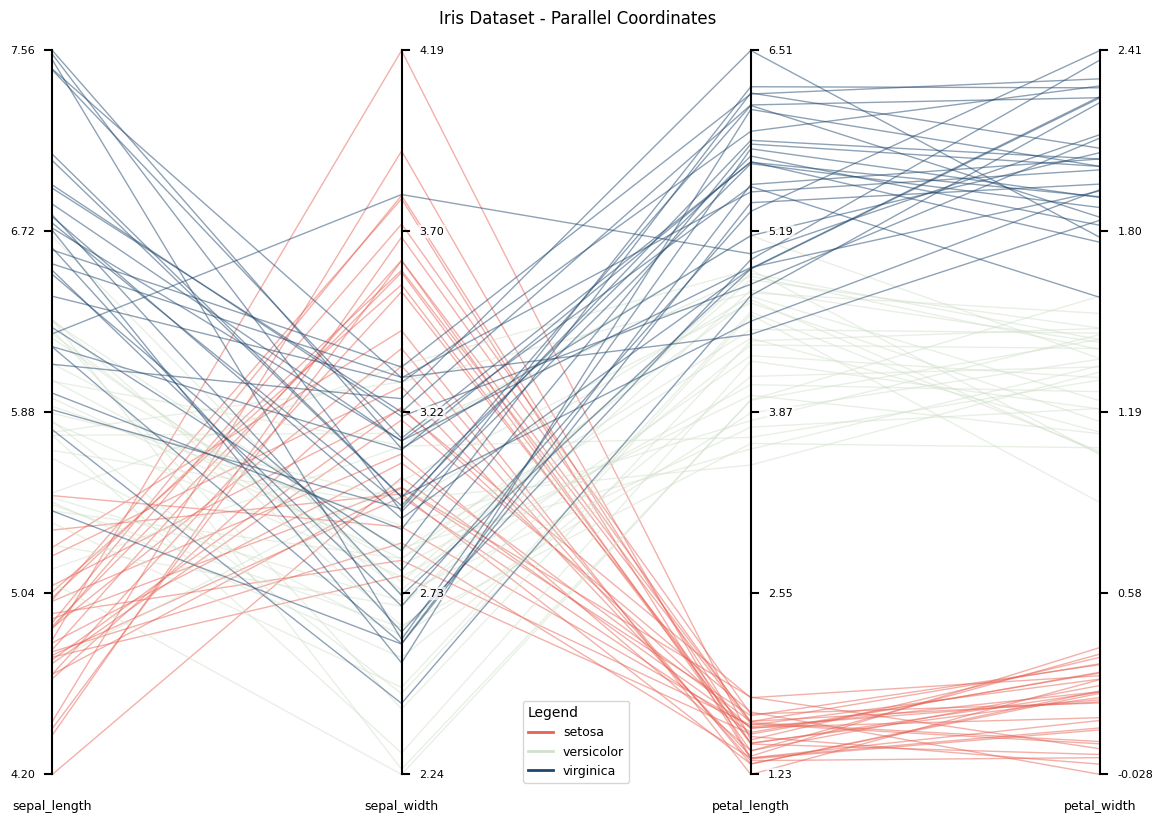

In [20]:
figure = ParallelCoords(
    data=iris_data,
    title="Iris Dataset - Parallel Coordinates",
    hue="species",
    dimensions=["sepal_length", "sepal_width", "petal_length", "petal_width"],
    show_legend=True,
    figsize=FIG_SIZE.A4_LANDSCAPE,
)

In [21]:
save_figure(figure, "./fig_parallel_coords.png", dpi=300)

The figure should be saved in the current working directory.